# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [55]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-04-20,74142,88.0,14.0,94.0,9.0,0.0,0.0,0.0,102.0,...,24601,0.0,11.0,70.0,0.0,29.0,0.0,0.0,4.0,0.0
112,2020-04-21,77274,35.0,22.0,89.0,4.0,0.0,0.0,0.0,90.0,...,28065,1.0,7.0,92.0,1.0,0.0,0.0,0.0,4.0,0.0
113,2020-04-22,87387,61.0,25.0,93.0,0.0,0.0,0.0,1.0,112.0,...,37289,0.0,8.0,35.0,0.0,29.0,0.0,0.0,0.0,3.0
114,2020-04-23,67629,84.0,25.0,99.0,6.0,0.0,0.0,0.0,144.0,...,17588,0.0,6.0,24.0,0.0,3.0,0.0,0.0,9.0,0.0


Imprimos los resultados y agregamos el numero del dia


In [57]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
111,110,446.0
112,111,660.0
113,112,270.0
114,113,452.0


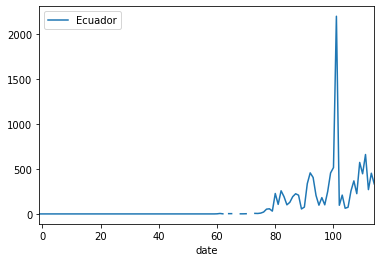

In [58]:
df.plot(x ='date', y='Ecuador')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [173]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


155.0
223.66


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [127]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

11338


65
65


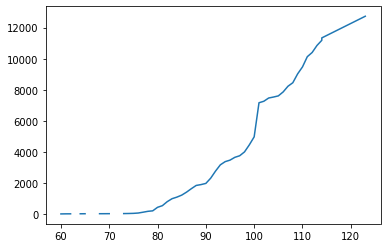

12733


In [128]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
x_respaldo=np.zeros(len(x[61:]))
y_respaldo=np.zeros(len(y[61:]))
x_real= np.zeros(len(x[61:]))
y_real= np.zeros(len(y[61:]))
x_respaldo=x[61:]
y_respaldo=y[61:]
x_real=x[61:]
y_real=y[61:]
x
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
print(len(y[61:]))
print(len(x[61:]))
plt.plot(x[61:], y[61:])
plt.show()
print(y[-1])


In [129]:

y_real[3]=0
y_real[6]=0
y_real[7]=0
y_real[11]=0
y_real[12]=0
y_respaldo[3]=0
y_respaldo[6]=0
y_respaldo[7]=0
y_respaldo[11]=0
y_respaldo[12]=0
print(x_real)
print(y_real)

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
[1.0, 6.0, 7.0, 0, 10.0, 13.0, 0, 0, 14.0, 15.0, 17.0, 0, 0, 23.0, 28.0, 37.0, 58.0, 111.0, 168.0, 199.0, 426.0, 532.0, 789.0, 981.0, 1082.0, 1211.0, 1403.0, 1627.0, 1835.0, 1890.0, 1966.0, 2302.0, 2758.0, 3163.0, 3368.0, 3465.0, 3646.0, 3747.0, 3995.0, 4450.0, 4965.0, 7161.0, 7257.0, 7466.0, 7529.0, 7603.0, 7858.0, 8225.0, 8450.0, 9022.0, 9468.0, 10128.0, 10398.0, 10850.0, 11183.0]


# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

# Comparar el modelo de predicion matematico vs probabilidad

10666.184415584421
16843.024341299235
16737.820597040416
13218.500316102174
11328.990332264279


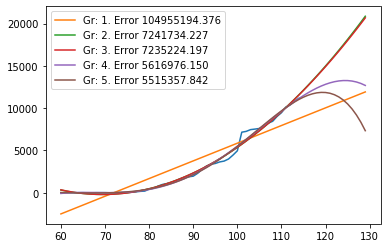

In [86]:
# Calcular ajustes para diferentes grados
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x_real, y_real)
sols = {}
for grado in range(1,6):
  z = np.polyfit(x_real, y_real, grado, full=True)
  sols[grado] = z
xp = np.array(range(60,130))
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)
  print(p(123))  
  plt.plot(xp, p(xp), "-", label="Gr: %s. Error %.3f" % (grado, error) )
plt.legend()

# Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.

In [169]:
x_semana= np.zeros(len(x[61:]))
y_semana= np.zeros(len(y[61:]))
for i in range(x_real[-1], x_real[-1]+7):
    x_real.append(i)
    y_real.append(int(y_real[-1] + mediana))
print(len(y_real))
print(len(x_real))
print(y_real)

62
62
[1.0, 6.0, 7.0, 0, 10.0, 13.0, 0, 0, 14.0, 15.0, 17.0, 0, 0, 23.0, 28.0, 37.0, 58.0, 111.0, 168.0, 199.0, 426.0, 532.0, 789.0, 981.0, 1082.0, 1211.0, 1403.0, 1627.0, 1835.0, 1890.0, 1966.0, 2302.0, 2758.0, 3163.0, 3368.0, 3465.0, 3646.0, 3747.0, 3995.0, 4450.0, 4965.0, 7161.0, 7257.0, 7466.0, 7529.0, 7603.0, 7858.0, 8225.0, 8450.0, 9022.0, 9468.0, 10128.0, 10398.0, 10850.0, 11183.0, 12214, 13245, 14276, 15307, 16338, 17369, 18400]


0.13620760627744413
12804.928808966084
==== R0 ===
1.0637123275692934e-05
==susceptibles==
25498.999989363194
==Recuperados==
1.000010636819271


<function matplotlib.pyplot.show(*args, **kw)>

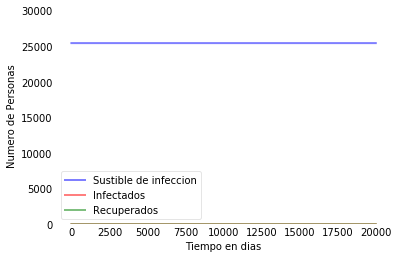

In [180]:
import numpy as np 
from datetime import datetime,timedelta
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd,requests,sys,numpy as np, matplotlib, math, matplotlib.pyplot as plt,scipy
from bs4 import BeautifulSoup
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

from IPython.display import display



def loss(point, data, recovered, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

data = (y_real)
 
# Total de la poblacion
N = 25500
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

optimal = minimize(loss, [0.001,0.001], args=(data, y_real, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])

beta, gamma = optimal.x


beta *= 10000
gamma *= 100000 

# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.589,0.045
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 20000,20000)
print("=======")
print(beta)
print(gamma)
print("==== R0 ===")
print(beta/gamma)
print("=======") 
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

print("==susceptibles==")
print(S[len(S)-1])
print("=======") 
print("==Recuperados==")
print(R[len(R)-1])
print("=======")
#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show

# Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

In [160]:
x_entrenar= np.zeros(len(x_respaldo)-7)
y_entrenar= np.zeros(len(y_respaldo)-7)

x_test= np.zeros(7)
y_test= np.zeros(7)
for i in range(len(x_respaldo)-7):
    x_entrenar[i]=x_respaldo[i]
    y_entrenar[i]=y_respaldo[i]
for i in range(7):
    x_test[i]=x_respaldo[48+i]
    y_test[i]=y_respaldo[48+i]
x_entrenar_poli= np.zeros(len(x_entrenar))
y_entrenar_poli= np.zeros(len(y_entrenar))
x_entrenar_poli=x_entrenar
y_entrenar_poli=y_entrenar
print(y_entrenar[-1])

8225.0


########
155.0
185.4390243902439
########
8380.0
8535.0
8690.0
8845.0
9000.0
9155.0
9310.0
########
Reales
8450.0
9022.0
9468.0
10128.0
10398.0
10850.0
11183.0
########


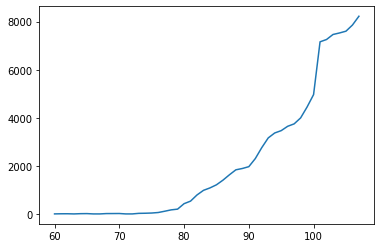

In [178]:

filtro2 = df["Ecuador"][61:107] # Filtro los datos que se empezo a tener casos
media = filtro2.mean()
mediana = filtro.median()
print("########")
print(mediana)
print(media)
print("########")

x_prec_esta=np.zeros(len(x_entrenar)+7)
y_prec_esta=np.zeros(len(y_entrenar)+7)
for i in range(len(x_entrenar)+7):
    x_prec_esta[i]=60+i
    if i <= 47:
        y_prec_esta[i]=y_entrenar[i]
    else:
        y_prec_esta[i]=y_prec_esta[i-1]+mediana    
for i in range(7):
    print(y_prec_esta[48+i])
print("########")
print("Reales")
for i in range(7):
    print(y_test[i])
print("########")
plt.plot(x_entrenar, y_entrenar)
plt.show()

funcion
6349.265957446811
6520.488547546682
6691.711137646549
6862.93372774642
7034.156317846291
7205.3789079461585
7376.6014980460295
funcion
8978.599618408854
9471.781432300006
9977.841615142795
10496.780166937238
11028.59708768333
11573.292377381073
12130.866036030464
funcion
9404.433446397348
10001.90109571425
10622.675697525383
11267.166215891231
11935.781614872287
12628.930858529044
13347.022910922014
funcion
9171.552449215058
9673.966630293988
10182.578139584424
10696.230354610889
11213.706438031542
11733.729337638099
12254.961786354485
funcion
8871.706388265826
9190.541348354542
9464.171454774565
9683.376997700194
9838.180285257287
9917.819312705891
9910.721431573154


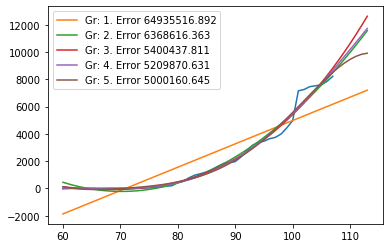

In [156]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x_entrenar_poli, y_entrenar_poli)
sols = {}
for grado in range(1,6):
  z = np.polyfit(x_entrenar_poli, y_entrenar_poli, grado, full=True)
  sols[grado] = z
xp = np.array(range(60,114))
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)
  print("funcion")  
  for i in range(7):
    print(p(108+i))
  plt.plot(xp, p(xp), "-", label="Gr: %s. Error %.3f" % (grado, error) )
plt.legend()

## Analisis
en el analisis tenemos los siguientes datos en el modelo Probabilidad tenemos los siguientes datos:
                        
                        8380.0
                        8535.0
                        8690.0
                        8845.0
                        9000.0
                        9155.0
                        9310.0

el modelo polinomico de tecer grado tenemos:

                        9404.433446397348
                        10001.90109571425
                        10622.675697525383
                        11267.166215891231
                        11935.781614872287
                        12628.930858529044
                        13347.022910922014

los datos reales son
                        8450.0
                        9022.0
                        9468.0
                        10128.0
                        10398.0
                        10850.0
                        11183.0


## Conclusiones

pódemos decir que en base a los resultados obtenidos el modelo que mejor se adapta es el modelo polinomico ya que este no tiene mucho diferencia con los datos reales de los ultimos dias

el modelo de probabilidad esta muy cercano a la primeras cifras reales pero mediante van pasado los dias la diferencia entra ambas va crecierdo de manera muy alta

## Criterio personal (politico, economico y  social de la situacion)

Politica: con respecto a la parte politica en el pais hay un descontento con respecto a nuestra maxima autoridad que el presidente debido al poco interes de su parte esto genra que las personas se sientan un poco desprotegidas pro parte de su mandatario y dado a lugar qu nuevas figuras politicas sobresalgana a la luz asi como el vicepresidente, lo que si ha sido evidente lo poco y mal preparados que estamos para este tipo de emergencias

Economica: la parte economica sera una de las mas afectadas debido a la para de las fabricas como las falta de turismo exportaciones y demas actos economicos, estos era un duro golpe para el país esperemos que al final de emergia todo se normalise a nivel nacional 

Social: en el ambito social se tiene el pais tiene que aprender a tener una costumbre de comunicacion real debido ala fala informacion enla provicia del guayas a la falta de conocimiento en foco de epidemia se les ha ido de las manos y las oersionas siguen sin entender los cual es lamentable socialmetne el pais debe mejorar un monton  



# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/